<a href="https://colab.research.google.com/github/gakuba/Machine-Learning/blob/master/corporacion_favorita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.tabular import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#torch.cuda.set_device(0)

In [ ]:
Config.DEFAULT_CONFIG_PATH = '/content/drive/My Drive/PREPARE COURSE/myconfig.yml'

In [ ]:
Config().data_path()


PosixPath('/content/drive/My Drive/PREPARE COURSE/data')

In [ ]:
path = Config().data_path()
train_df = pd.read_pickle(path/'train_sample_clean')
test_df = pd.read_pickle(path/'test_sample_clean')

In [ ]:
train_df['item_weights'] = np.maximum([1]*len(train_df['perishable']),train_df['perishable']*1.25)
test_df['item_weights'] = np.maximum([1]*len(test_df['perishable']),test_df['perishable']*1.25)


In [ ]:
set(train_df['item_weights'])

{1.0, 1.25}

In [ ]:
train_df = train_df[train_df['unit_sales'] >= 0]
test_df = test_df[test_df['unit_sales'] >= 0]

In [ ]:
train_df.shape

(2372194, 55)

In [ ]:
train_df.head()

,index,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Afteronpromotion,Beforeonpromotion,Afterlocale_National,Beforelocale_National,Afterlocale_Regional,Beforelocale_Regional,Afterlocale_Local,Beforelocale_Local,onpromotion_bw,locale_National_bw,locale_Regional_bw,locale_Local_bw,onpromotion_fw,locale_National_fw,locale_Regional_fw,locale_Local_fw,transactions,item_weights
0,0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,0,0,0,0,1,0,0,0,1,0,2013,1,1,1,1,1,False,True,False,True,False,True,1356998400,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,2.0,0.0,0.0,770,1.25
1,1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0,Salinas,Santa Elena,D,1,0,0,0,0,1,0,0,0,1,0,2013,1,1,1,1,1,False,True,False,True,False,True,1356998400,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,2.0,0.0,0.0,770,1.00
2,2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0,Salinas,Santa Elena,D,1,0,0,0,0,1,0,0,0,1,0,2013,1,1,1,1,1,False,True,False,True,False,True,1356998400,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,2.0,0.0,0.0,770,1.00
3,3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0,Salinas,Santa Elena,D,1,0,0,0,0,1,0,0,0,1,0,2013,1,1,1,1,1,False,True,False,True,False,True,1356998400,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,1.0,0.0,0.0,770,1.00
4,4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1,Salinas,Santa Elena,D,1,0,0,0,0,1,0,0,0,1,0,2013,1,1,1,1,1,False,True,False,True,False,True,1356998400,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,2.0,0.0,0.0,770,1.25


In [ ]:
description_stats = train_df.describe().T

In [ ]:
description_stats[description_stats['std']==0].index.values

array(['transferred', 'type_Additional', 'type_Bridge', 'type_Event', 'type_Transfer', 'locale_Local',
       'locale_Regional', 'Year', 'Afteronpromotion', 'Beforeonpromotion', 'Afterlocale_Regional',
       'Beforelocale_Regional', 'Afterlocale_Local', 'Beforelocale_Local', 'onpromotion_bw', 'locale_Regional_bw',
       'locale_Local_bw', 'onpromotion_fw', 'locale_Regional_fw', 'locale_Local_fw'], dtype=object)

In [ ]:
description_stats[description_stats['std']!=0].index.values

array(['index', 'id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'class', 'perishable', 'cluster',
       'type_Holiday', 'type_Work Day', 'locale_National', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Elapsed',
       'Afterlocale_National', 'Beforelocale_National', 'locale_National_bw', 'locale_National_fw', 'transactions',
       'item_weights'], dtype=object)

In [ ]:
train_df.columns

Index(['index', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'onpromotion', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster', 'transferred', 'type_Additional', 'type_Bridge',
       'type_Event', 'type_Holiday', 'type_Transfer', 'type_Work Day',
       'locale_Local', 'locale_National', 'locale_Regional', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Elapsed', 'Afteronpromotion', 'Beforeonpromotion',
       'Afterlocale_National', 'Beforelocale_National', 'Afterlocale_Regional',
       'Beforelocale_Regional', 'Afterlocale_Local', 'Beforelocale_Local',
       'onpromotion_bw', 'locale_National_bw', 'locale_Regional_bw',
       'locale_Local_bw', 'onpromotion_fw', 'locale_National_fw',
       'locale_Regional_fw', 'locale_Local_fw', 'transactions',
       'item_weights'],
      dtype='object')

In [ ]:
procs=[FillMissing, Categorify, Normalize]

In [ ]:
#don't include 'onpromotion'
# 'transferred', 'type_Additional', 'type_Bridge', 'type_Event', 'type_Transfer', 'locale_Local',
#        'locale_Regional', 'Year', 'Afteronpromotion', 'Beforeonpromotion', 'Afterlocale_Regional',
#        'Beforelocale_Regional', 'Afterlocale_Local', 'Beforelocale_Local', 'onpromotion_bw', 'locale_Regional_bw',
#        'locale_Local_bw', 'onpromotion_fw', 'locale_Regional_fw', 'locale_Local_fw'
cat_vars = ['store_nbr', 'item_nbr','onpromotion',
        'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster', 'transferred', 'type_Additional', 'type_Bridge',
       'type_Event', 'type_Holiday', 'type_Transfer', 'type_Work Day',
       'locale_Local', 'locale_National', 'locale_Regional', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Afteronpromotion', 'Beforeonpromotion',
       'Afterlocale_National', 'Beforelocale_National', 'Afterlocale_Regional',
       'Beforelocale_Regional', 'Afterlocale_Local', 'Beforelocale_Local',
       'onpromotion_bw', 'locale_National_bw', 'locale_Regional_bw',
       'locale_Local_bw', 'onpromotion_fw', 'locale_National_fw',
       'locale_Regional_fw', 'locale_Local_fw']
# cat_vars = ['store_nbr', 'item_nbr', 'class', 'perishable', 'cluster',
#        'type_Holiday', 'type_Work Day', 'locale_National', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#        'Afterlocale_National', 'Beforelocale_National', 'locale_National_bw', 'locale_National_fw']

In [ ]:
cont_vars = ['transactions']

In [ ]:
dep_var = 'unit_sales'
df = train_df[cat_vars + cont_vars + [dep_var,'date','item_weights']].copy()

In [ ]:
valid_df = test_df[cat_vars + cont_vars + [dep_var,'date','item_weights']].copy()

In [ ]:
test_df['date'].min(), test_df['date'].max()

(Timestamp('2013-03-01 00:00:00'), Timestamp('2013-03-07 00:00:00'))

In [ ]:
cut = train_df['date'][(train_df['date'] == train_df['date'][len(test_df)])].index.max()
cut

324275

In [ ]:
train_df[cat_vars+['unit_sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,2372194.0,26.612357,16.504801,1.000,11.0,27.0,43.0,54.0
item_nbr,2372194.0,619961.713128,304468.972269,96995.000,358134.0,598414.0,876224.0,1137146.0
onpromotion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,2372194.0,1913.450249,1050.965459,1002.000,1044.0,1124.0,2718.0,7034.0
perishable,2372194.0,0.219265,0.413748,0.000,0.0,0.0,0.0,1.0
cluster,2372194.0,8.737129,4.758285,1.000,4.0,9.0,13.0,17.0
transferred,2372194.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
type_Additional,2372194.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
type_Bridge,2372194.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
type_Event,2372194.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0


In [ ]:
train_df[train_df['unit_sales'] < 0]

,index,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Afteronpromotion,Beforeonpromotion,Afterlocale_National,Beforelocale_National,Afterlocale_Regional,Beforelocale_Regional,Afterlocale_Local,Beforelocale_Local,onpromotion_bw,locale_National_bw,locale_Regional_bw,locale_Local_bw,onpromotion_fw,locale_National_fw,locale_Regional_fw,locale_Local_fw,transactions,item_weights


In [ ]:
valid_idx = range(cut)

In [ ]:
df[dep_var].head()

0    7.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: unit_sales, dtype: float64

In [ ]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                # .split_by_idx(valid_idx)
                .split_none()
                .label_from_df(cols=[dep_var,'item_weights'], label_cls=FloatList, log=True))
                # .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                # .databunch())

In [ ]:
valid = data = (TabularList.from_df(valid_df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                # .split_by_idx(valid_idx)
                .split_none()
                .label_from_df(cols=[dep_var,'item_weights'], label_cls=FloatList, log=True))

In [ ]:
data.valid = valid.train

In [ ]:
data = data.databunch()

In [ ]:
data.show_batch(ds_type = DatasetType.Valid, rows=10)

store_nbr,item_nbr,onpromotion,family,class,perishable,city,state,type,cluster,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Afteronpromotion,Beforeonpromotion,Afterlocale_National,Beforelocale_National,Afterlocale_Regional,Beforelocale_Regional,Afterlocale_Local,Beforelocale_Local,onpromotion_bw,locale_National_bw,locale_Regional_bw,locale_Local_bw,onpromotion_fw,locale_National_fw,locale_Regional_fw,locale_Local_fw,transactions,target
1,96995,#na#,GROCERY I,1093,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.]
1,103520,#na#,GROCERY I,1028,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0.693147 0. ]
1,103665,#na#,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.791759 0.223144]
1,105574,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.]
1,105575,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[2.197225 0. ]
1,105577,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,18,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0.693147 0. ]
1,105737,#na#,GROCERY I,1044,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,48,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.098612 0. ]
1,105857,#na#,GROCERY I,1092,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[2.302585 0. ]
1,106716,#na#,GROCERY I,1032,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.609438 0. ]
1,108696,#na#,DELI,2636,1,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.098612 0.223144]


In [ ]:
w_sum = train_df['item_weights'].sum()
w_sum

2502228.5

In [ ]:
weights = (train_df['perishable']*1.25).values

In [ ]:
flatten_check

<function fastai.torch_core.flatten_check>

In [ ]:
def inv_y(a): return torch.exp(a.cpu())
def NWRMSLE(y_pred, targ):
#  y_pred,targ = flatten_check(y_pred,targ)
#  y_pred, targ = torch.exp(y_pred), torch.exp(targ)
 targ = inv_y(targ)
 y_pred = inv_y(y_pred)

 targ_var = targ[:,0][:,None]
 targ_weight = targ[:,1][:,None]
 y_pred_var = y_pred[:,0][:,None]
 
 pct_var = np.log(y_pred_var+1) - np.log(targ_var+1)
 return torch.sqrt(((pct_var**2)*targ_weight).sum()/targ_weight.sum())

In [ ]:
max_log_y = np.log(np.max(train_df['unit_sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [ ]:
from torch.autograd import Variable
# def inv_y_gpu(a): return torch.exp(a)
def weighted_mse_loss(input,target):
    #alpha of 0.5 means half weight goes to first, remaining half split by remaining 15
    # weights = Variable(torch.Tensor(weights)).cuda()
    # target = inv_y_gpu(target)

    # input = inv_y_gpu(input)
      
    pct_var = (input[:,0][:,None] - target[:,0][:,None])**2
    out = pct_var * target[:,1][:,None]
    loss = out.mean() 
    return loss

In [ ]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                         metrics=NWRMSLE,loss_func=weighted_mse_loss)

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(47, 14)
    (1): Embedding(1633, 101)
    (2): Embedding(1, 2)
    (3): Embedding(22, 9)
    (4): Embedding(178, 29)
    (5): Embedding(3, 3)
    (6): Embedding(20, 9)
    (7): Embedding(16, 8)
    (8): Embedding(6, 4)
    (9): Embedding(18, 8)
    (10): Embedding(2, 2)
    (11): Embedding(2, 2)
    (12): Embedding(2, 2)
    (13): Embedding(2, 2)
    (14): Embedding(2, 2)
    (15): Embedding(2, 2)
    (16): Embedding(2, 2)
    (17): Embedding(2, 2)
    (18): Embedding(2, 2)
    (19): Embedding(2, 2)
    (20): Embedding(2, 2)
    (21): Embedding(2, 2)
    (22): Embedding(3, 3)
    (23): Embedding(8, 5)
    (24): Embedding(8, 5)
    (25): Embedding(8, 5)
    (26): Embedding(2, 2)
    (27): Embedding(3, 3)
    (28): Embedding(2, 2)
    (29): Embedding(2, 2)
    (30): Embedding(2, 2)
    (31): Embedding(2, 2)
    (32): Embedding(2, 2)
    (33): Embedding(2, 2)
    (34): Embedding(25, 10)
    (35): Embedding(2, 2)
    (36): Embedding(

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,NWRMSLE,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


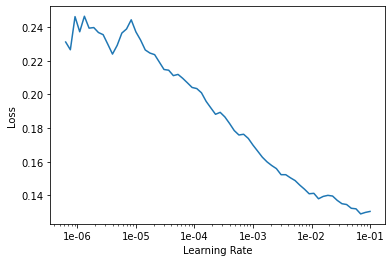

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,NWRMSLE,time
0,0.024054,0.023814,1.144551,02:58


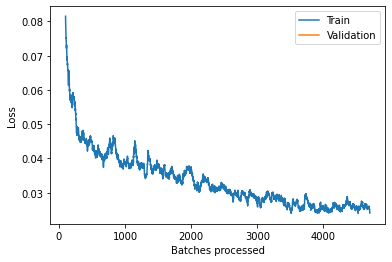

In [ ]:
learn.recorder.plot_losses(skip_start=100)

In [ ]:
learn.show_results(ds_type=DatasetType.Valid)

store_nbr,item_nbr,onpromotion,family,class,perishable,city,state,type,cluster,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Afteronpromotion,Beforeonpromotion,Afterlocale_National,Beforelocale_National,Afterlocale_Regional,Beforelocale_Regional,Afterlocale_Local,Beforelocale_Local,onpromotion_bw,locale_National_bw,locale_Regional_bw,locale_Local_bw,onpromotion_fw,locale_National_fw,locale_Regional_fw,locale_Local_fw,transactions,target,prediction
1,96995,#na#,GROCERY I,1093,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.],[-0.235363 -0.095978]
1,103520,#na#,GROCERY I,1028,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0.693147 0. ],[-0.271223 -0.073587]
1,103665,#na#,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.791759 0.223144],[ 1.175567 -0.026445]
1,105574,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.],[0.919431 0.044684]
1,105575,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[2.197225 0. ],[0.938494 0.04525 ]


In [ ]:
learn.save('1')

In [ ]:
learn.load('1')

Learner(data=TabularDataBunch;

Train: LabelList (301036 items)
x: TabularList
store_nbr 1; item_nbr 96995; onpromotion #na#; family GROCERY I; class 1093; perishable 0; city Quito; state Pichincha; type D; cluster 13; transferred 0; type_Additional 0; type_Bridge 0; type_Event 0; type_Holiday 0; type_Transfer 0; type_Work Day 0; locale_Local 0; locale_National 0; locale_Regional 0; Year 2013; Month 3; Week 9; Day 1; Dayofweek 4; Dayofyear 60; Is_month_end False; Is_month_start True; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; Afteronpromotion 0; Beforeonpromotion 0; Afterlocale_National 0; Beforelocale_National 0; Afterlocale_Regional 0; Beforelocale_Regional 0; Afterlocale_Local 0; Beforelocale_Local 0; onpromotion_bw 0; locale_National_bw 0.0; locale_Regional_bw 0.0; locale_Local_bw 0.0; onpromotion_fw 0; locale_National_fw 0.0; locale_Regional_fw 0.0; locale_Local_fw 0.0; transactions -0.0427; ,store_nbr 1; item_nbr 103520; onpromotion #na#

epoch,train_loss,valid_loss,NWRMSLE,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


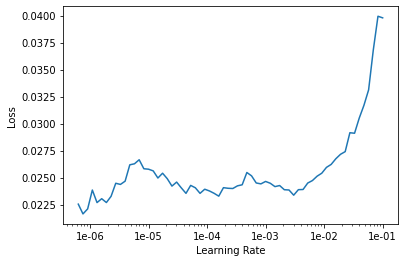

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,NWRMSLE,time
0,0.025704,0.025167,1.099538,02:58
1,0.025302,0.024582,0.877033,02:57
2,0.023162,0.021999,0.850758,02:58
3,0.021116,0.019985,0.829455,03:00
4,0.019438,0.018931,0.828360,02:58


In [ ]:
learn.save('2')

In [ ]:
learn.load('2')

Learner(data=TabularDataBunch;

Train: LabelList (301036 items)
x: TabularList
store_nbr 1; item_nbr 96995; onpromotion #na#; family GROCERY I; class 1093; perishable 0; city Quito; state Pichincha; type D; cluster 13; transferred 0; type_Additional 0; type_Bridge 0; type_Event 0; type_Holiday 0; type_Transfer 0; type_Work Day 0; locale_Local 0; locale_National 0; locale_Regional 0; Year 2013; Month 3; Week 9; Day 1; Dayofweek 4; Dayofyear 60; Is_month_end False; Is_month_start True; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; Afteronpromotion 0; Beforeonpromotion 0; Afterlocale_National 0; Beforelocale_National 0; Afterlocale_Regional 0; Beforelocale_Regional 0; Afterlocale_Local 0; Beforelocale_Local 0; onpromotion_bw 0; locale_National_bw 0.0; locale_Regional_bw 0.0; locale_Local_bw 0.0; onpromotion_fw 0; locale_National_fw 0.0; locale_Regional_fw 0.0; locale_Local_fw 0.0; transactions -0.0427; ,store_nbr 1; item_nbr 103520; onpromotion #na#

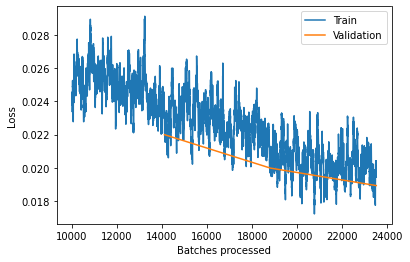

In [ ]:
learn.recorder.plot_losses(skip_start=10000)

In [ ]:
len(learn.recorder.losses)

23515

In [ ]:
learn.show_results(ds_type=DatasetType.Valid)

store_nbr,item_nbr,onpromotion,family,class,perishable,city,state,type,cluster,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Afteronpromotion,Beforeonpromotion,Afterlocale_National,Beforelocale_National,Afterlocale_Regional,Beforelocale_Regional,Afterlocale_Local,Beforelocale_Local,onpromotion_bw,locale_National_bw,locale_Regional_bw,locale_Local_bw,onpromotion_fw,locale_National_fw,locale_Regional_fw,locale_Local_fw,transactions,target,prediction
1,96995,#na#,GROCERY I,1093,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.],[ 0.532582 -0.000794]
1,103520,#na#,GROCERY I,1028,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0.693147 0. ],[1.371841 0.001513]
1,103665,#na#,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[1.791759 0.223144],[1.200680e+00 9.702253e-04]
1,105574,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[0. 0.],[ 0.353712 -0.000669]
1,105575,#na#,GROCERY I,1045,0,Quito,Pichincha,D,13,0,0,0,0,0,0,0,0,0,0,2013,3,9,1,4,60,False,True,False,False,False,False,0,0,17,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,-0.0427,[2.197225 0. ],[1.438312e+00 1.267136e-03]


In [ ]:
valid_predictions = learn.get_preds(ds_type=DatasetType.Valid)[0]

In [ ]:
valid_predictions = valid_predictions.numpy()

In [ ]:
valid.train.y.items[:5000]

array([ 1.,  2.,  6.,  1., ...,  2.,  1., 62.,  5.], dtype=float32)

In [ ]:
error = valid_predictions - valid.train.y.items

In [ ]:
error

array([[ -0.820258,  -1.820258,  -5.820258,  -0.820258, ...,  -1.820258,  -0.820258, -61.82026 ,  -4.820258],
       [  0.408822,  -0.591178,  -4.591178,   0.408822, ...,  -0.591178,   0.408822, -60.59118 ,  -3.591178],
       [  0.257025,  -0.742975,  -4.742975,   0.257025, ...,  -0.742975,   0.257025, -60.742973,  -3.742975],
       [  0.513934,  -0.486066,  -4.486065,   0.513934, ...,  -0.486066,   0.513934, -60.486065,  -3.486065],
       ...,
       [  0.416439,  -0.583561,  -4.583561,   0.416439, ...,  -0.583561,   0.416439, -60.58356 ,  -3.583561],
       [ -0.274832,  -1.274832,  -5.274832,  -0.274832, ...,  -1.274832,  -0.274832, -61.27483 ,  -4.274832],
       [  2.672884,   1.672884,  -2.327116,   2.672884, ...,   1.672884,   2.672884, -58.327114,  -1.327116],
       [ -0.202894,  -1.202894,  -5.202894,  -0.202894, ...,  -1.202894,  -0.202894, -61.202892,  -4.202894]],
      dtype=float32)

In [ ]:
error = valid_predictions[:5000] - valid.train.y.items[:5000]
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [SalePrice]")
_ = plt.ylabel("Count")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5b02b2f268> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5b01a1f7b8> (for post_execute):


KeyboardInterrupt: ignored